In [1]:
import tensorflow as tf

/home/tsuman/Program_Files/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
single_image = mnist.train.images[1].reshape(28,28)

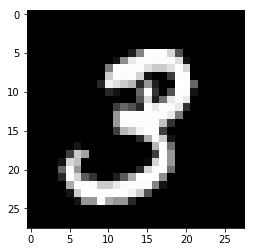

In [10]:
plt.imshow(single_image, cmap='gist_gray')

In [11]:
single_image.min()

0.0

In [12]:
single_image.max()

1.0

In [13]:
#PLACEHOLDERS
X = tf.placeholder(tf.float32, shape=[None, 784])

In [22]:
#VARIABLES
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [29]:
#CREATE GRAPH OPERATION
y = tf.matmul(X,W)

In [30]:
#LOSS FUNCTION
y_true = tf.placeholder(tf.float32, [None,10])

In [31]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [44]:
#OPTIMIZER
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [45]:
#CREATE SESSION
init = tf.global_variables_initializer()

In [46]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range (10000):
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={X:batch_x, y_true:batch_y})
    
        if step%100 == 0:
            #EVALUATE THE MODEL
            correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_true,1))
            #[True, False, True, ... ] --> [1, 0, 1, ... ]
            acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

            print(sess.run(acc, feed_dict={X:mnist.test.images, y_true:mnist.test.labels}))
       

0.3629
0.8543
0.8773
0.8891
0.898
0.9029
0.9059
0.9079
0.9095
0.9124
0.9139
0.9123
0.9122
0.9162
0.9179
0.9171
0.9181
0.9187
0.918
0.9183
0.9198
0.9186
0.9209
0.9221
0.921
0.9224
0.9225
0.9233
0.9224
0.9198
0.9214
0.923
0.9219
0.9224
0.923
0.9237
0.9241
0.9237
0.9256
0.9242
0.9246
0.9244
0.9234
0.9222
0.925
0.9253
0.924
0.9255
0.9242
0.924
0.9251
0.9253
0.9239
0.9259
0.9243
0.9254
0.9253
0.9245
0.9249
0.9255
0.926
0.9269
0.9263
0.9255
0.9266
0.9255
0.9269
0.926
0.9263
0.9253
0.9253
0.9251
0.926
0.9267
0.9266
0.9262
0.9259
0.9269
0.9251
0.9267
0.9264
0.9256
0.9266
0.9262
0.927
0.9279
0.9275
0.9267
0.9257
0.9258
0.9264
0.9249
0.9273
0.9248
0.9263
0.9235
0.9268
0.9259
0.9258
0.9267
